### The objective of this problem is to perform feature selection on the given dataset

Importing the libraries

In [1]:
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = utils.read('FODS-A2.csv')

#### Correlation Coefficients

Computing the Pearson correlation of each feature with the target attibute, and sorting with respect to the absolute value of the coefficients

In [2]:
x = data.corr(method = 'pearson')['Appliances']
x = np.array(x)[: -1]
y = data.columns[: -1]
y = np.array(y)
correlations = []
for i in range(len(x)):
    correlations.append([abs(x[i]), y[i]])

correlations.sort(reverse = True)

Building models with n features, weherin we take the first n features according to the sorted list. Results dataframe stores the respective errors.

In [3]:
df = pd.DataFrame()
target = data['Appliances'].tolist()

heading = {"Number of features": [], "Training Error": [], "Testing Error": []}
results = pd.DataFrame(heading)
for i in range(0, 26):
    feature = data[correlations[i][1]].tolist()
    df[correlations[i][1]] = feature
    
    df1 = df.copy()
    df1['Appliances'] = target

    testError, trainError = utils.regression(df1, 10000, 0.00001)
    results.loc[len(results.index)] = [i + 1, trainError, testError]

results 


,Number of features,Training Error,Testing Error
0,1.0,104.017192,98.940186
1,2.0,103.972975,98.853301
2,3.0,103.939922,98.920642
3,4.0,103.648389,98.586183
4,5.0,103.645372,98.558465
5,6.0,103.319726,98.027056
6,7.0,102.808894,97.980081
7,8.0,101.942815,97.756805
8,9.0,100.560299,96.084772
9,10.0,98.707203,95.394090


Plotting the training errors and testing errors with the number of features used in the model

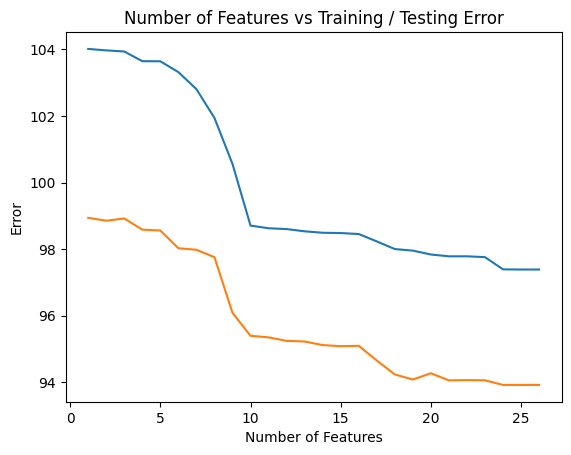

In [4]:
x = results['Number of features'].tolist()
y1 = results['Training Error'].tolist()
y2 = results['Testing Error'].tolist()

plt.xlabel('Number of Features')
plt.ylabel('Error')
plt.title("Number of Features vs Training / Testing Error")
plt.plot(x, y1, label = "Training Error")
plt.plot(x, y2, label = "Testing Error")
plt.show()

#### Principal Component Analysis

Computing the eigenvalues of the dataset (only the input features), and taking the eigenvectors corresponding to the first n eigenvalues in a sorted list. We have an n dimensional vector space wherein we can project the data points onto these n dimensions to reduce the number of features to n.

Making the models by reducing the number of features to components with the number varying from 1 to 26.

In [5]:
from sklearn.decomposition import PCA

df_x = data.drop(['Appliances'], axis = 1)
heading1 = {"Number of components": [], "Training Error": [], "Testing Error": [], "Percentage Variance Captured": []}
results1 = pd.DataFrame(heading1)

cov = np.cov(df_x, rowvar = False)
eigenValues, eigenVectors = np.linalg.eig(cov)
eigenValues = eigenValues.tolist()
eigenValues.sort(reverse = True)
sumEigen = sum(eigenValues)
s = 0

for i in range(1, 27):
    pca = PCA(n_components = i)
    pca.fit(df_x)
    xPCA = pca.transform(df_x)
    featureNames = []
    for j in range(0, i):
        featureNames.append(str(j))
    dfTransformed = pd.DataFrame(xPCA, columns = featureNames)
    dfTransformed['Appliances'] = target
    testErrorPCA, trainErrorPCA = utils.regression(dfTransformed, 10000, 0.00001)
    s += eigenValues[i - 1]
    results1.loc[len(results1.index)] = [i, trainErrorPCA, testErrorPCA, (s / sumEigen) * 100]

results1
    

,Number of components,Training Error,Testing Error,Percentage Variance Captured
0,1.0,104.889293,99.442722,54.873114
1,2.0,104.888877,99.442062,74.154423
2,3.0,104.887526,99.454082,81.507516
3,4.0,104.887457,99.454973,87.823240
4,5.0,103.729894,98.691059,92.539805
5,6.0,103.703555,98.831141,95.680140
6,7.0,103.653827,98.717879,97.913318
7,8.0,103.652583,98.721145,98.449016
8,9.0,103.256978,98.408648,98.811890
9,10.0,102.667292,97.030120,99.161085


Plotting the training errors and testing errors with the number of components used in the model

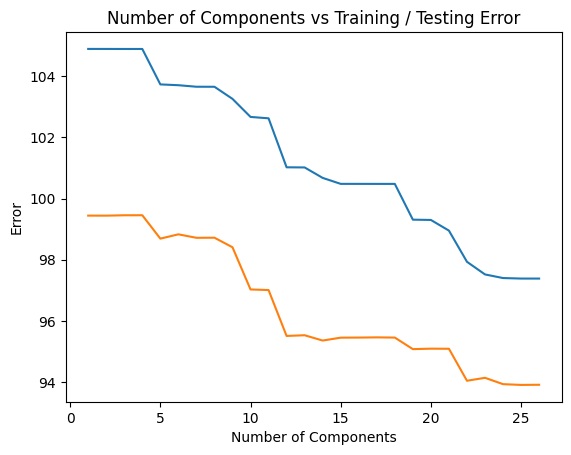

In [6]:
x = results1['Number of components'].tolist()
y1 = results1['Training Error'].tolist()
y2 = results1['Testing Error'].tolist()

plt.xlabel('Number of Components')
plt.ylabel('Error')
plt.title("Number of Components vs Training / Testing Error")
plt.plot(x, y1, label = "Training Error")
plt.plot(x, y2, label = "Testing Error")
plt.show()